<a href="https://colab.research.google.com/github/vaishnxvii/Sentimental-analysis-of-restaurant-reviews/blob/main/Aiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries  

In [ ]:
# Connecting Google Drive with Google Colab

from google.colab import drive
drive.mount('/content/drive')

In [21]:
# Importing essential Libraries

import numpy as np     #Linear algebra
import pandas as pd    #Data Processing , CSV Files I/O (eg. pd.read_CSV)
import matplotlib.pyplot as plt
from google.colab import files

# Exploratory Data Analysis

## Load and Prepare Data

In [23]:
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Restaurant reviews/Restaurant_Reviews.tsv'  # Update with your actual file path
data = pd.read_csv(file_path, delimiter='\t')


In [24]:
# Shape = Tuple of Array dimension (row, column)

data.shape

(1000, 2)

In [25]:
# Returns the label of each column in DataFrame

data.columns

Index(['Review', 'Liked'], dtype='object')

In [26]:
# view the data

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [27]:
# Information about the dataFrame

data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

## Data Preprocessing

In [28]:
# Importing essential libraries for performing Natural Language Processing on "Restaurant_Reviews.tsv" dataset

import nltk   #Natural Language Toolkit, is a Python package that you can use for NLP #Python has a built-in package called re, which can be used to work with Regular Expressions.
import re
nltk.download('stopwords')
from nltk.corpus import stopwords  # The NLTK corpus is a massive dump of all kinds of natural language data sets that are definitely worth taking look at. A stop word is a commonly used word (such as "the", "a", "on", "in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer  # Porters Stemmer It is a type of stemmer which is mainly known for Data Mining and Information Retrieval

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):   # 1000 records

 # cleaning special character from the reviews
 # The re.sub() method performs global search and global replace on the given string.
 review = re.sub(pattern= '[^a-zA-Z]',repl=' ', string=data['Review'][i])

 # Converting the entire review into lower case
 review = review.lower()

 # Tokenizing the review by words
 review_words = review.split()

 # Removing the stop words
 review_words = [word for word in review_words if not word in set(stopwords.words("english"))]

 # Stemming the words
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review_words]

 # Joining the stemmed words
 review = ' '.join(review)

 # Creating a corpus
 corpus.append(review)

In [30]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [31]:
# Creating the bag of Words model
from sklearn.feature_extraction.text import CountVectorizer          #Countvectorizer is a method to convert text to numerical data
cv = CountVectorizer(max_features=1500)          #max_features=1500
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

# Split Data - (1000, 1500)

In this step, we are going to split data
in two parts (training and testing), so that we can train our model on training dataset and test it's accuracy on unseen test data.

In [32]:
from sklearn.model_selection import train_test_split          #Use to split the original data into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. If you don't seed, it is diffrent each time.

# Training (1000, 1500)
# 1000 88/100- 800
# 1000 20/100- 200

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))



* Usually we take more and more data in training so it's easy for model to learn with more data.



# Model Training

As we're done with the preprocessing part, we will now Train our model.

**Multinomial Naive** **Bayes** - The algorithm is a probabilistic learning method that is mostly used in Natural Language Processing(NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

In [34]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
classifier = MultinomialNB()

# Train the model on the training data
classifier.fit(x_train, y_train)

MultinomialNB()

In [35]:
# Make predictions on the test data

y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [36]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall * 100:.2f}%")

# Generate a classification report with precision, recall, F1-score, and support
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 76.50%
Precision: 76.42%
Recall: 78.64%
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [39]:
# Making the Confusion Matrix
# A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[72, 25],
       [22, 81]])

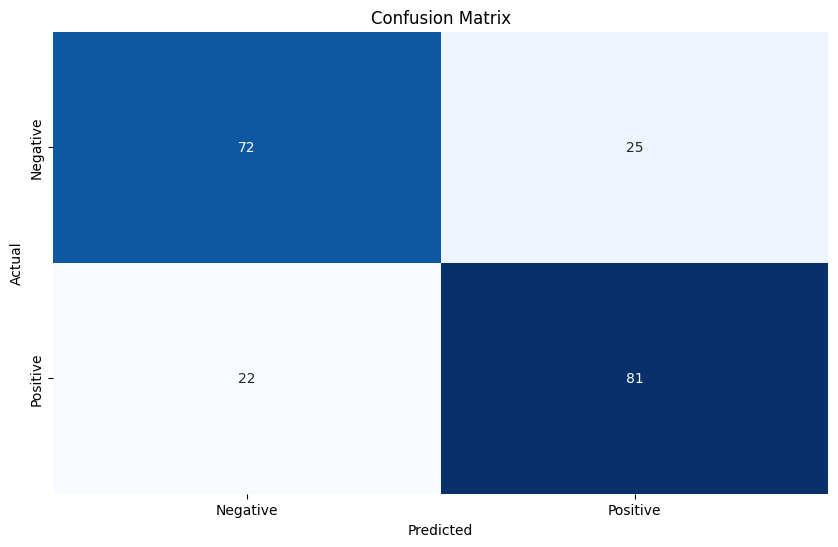

In [40]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# Hyperparameter tuning the Naive Bayes Classifier

best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB (alpha=i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [42]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.2)

# Predictions

In [43]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [44]:
# Predicting values
sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [45]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')


This is a POSITIVE review.
